<a href="https://colab.research.google.com/github/Satyabrata117/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**     - Satyabrata Sahoo

# **Project Summary -**

This project focuses on helping an insurance company predict whether customers who previously had health insurance would be interested in purchasing vehicle insurance. By analyzing demographic data, vehicle details, and policy-related information, we aim to build a predictive model that identifies potential customers for targeted communication.

The process involves cleaning and exploring the dataset, performing exploratory data analysis (EDA), and engineering features to enhance the model's accuracy. Using machine learning algorithms, we develop a model that predicts customer interest in vehicle insurance. The model is fine-tuned and evaluated using metrics like accuracy and precision.

The key outcome is actionable insights. By analyzing the model predictions, we pinpoint customer segments likely to be interested in vehicle insurance. Recommendations on optimizing the communication strategy are then provided, enabling the insurance company to tailor its approach and increase the likelihood of converting interest into purchases.

The final report documents the entire process, from data preprocessing to model building and evaluation. This concise summary emphasizes the practical application of predictive modeling to enhance targeted marketing efforts and drive revenue growth for the insurance company.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The insurance company faces the challenge of identifying customers who previously held health insurance and predicting their interest in purchasing vehicle insurance. To address this, the project aims to leverage demographic information, vehicle details, and policy-related data to build a predictive model. The specific problem is to develop a model that accurately classifies customers based on their likelihood of being interested in vehicle insurance, enabling the company to optimize its communication strategy and increase revenue through targeted outreach.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [150]:
# Import Libraries
# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [151]:
# Load Dataset

### Dataset First View

In [152]:
# Dataset First Look


In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
insurance_df = pd.read_csv('/content/drive/MyDrive/Project data/Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset Rows & Columns count

In [155]:
# Dataset Rows & Columns count
insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [156]:
insurance_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Information

In [157]:
# Datas info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [158]:
insurance_df.shape

(381109, 12)

#### Duplicate Values

In [159]:
# Dataset Duplicate Value Count
duplicates = insurance_df[insurance_df.duplicated()]

# Display the duplicated values
print("Duplicated Values:")
print(duplicates)

Duplicated Values:
Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


In [160]:
insurance_df.duplicated().sum()

0

#### Missing Values/Null Values

In [161]:
# Missing Values/Null Values Count
missing_values_count = insurance_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


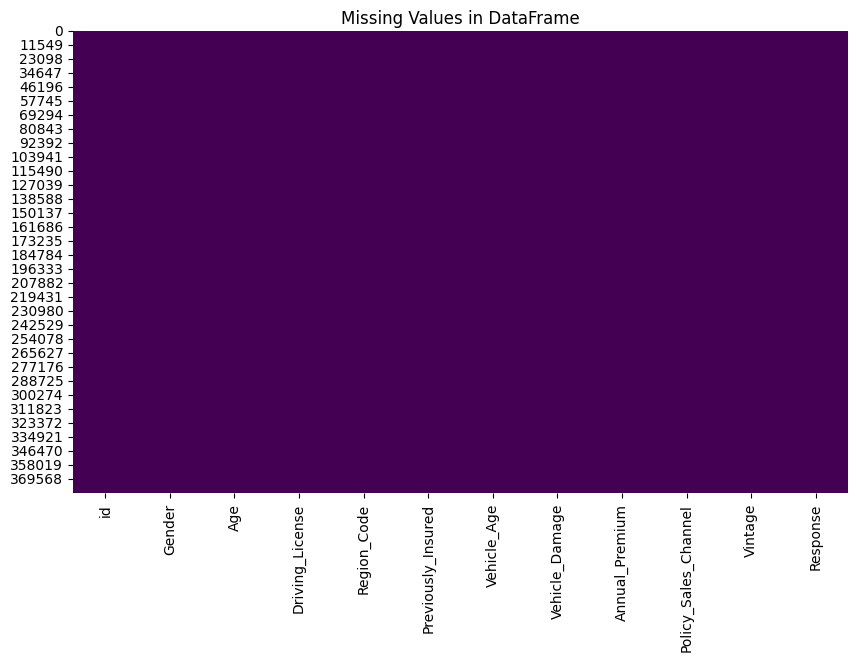

In [87]:
# Visualizing the missing values
missing_values = insurance_df.isnull()

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()

### What did you know about your dataset?

The dataset named "insurance_df" consists of 381,109 rows and 12 columns, with no apparent missing or duplicated values. Its cleanliness suggests a solid foundation for analysis or modeling tasks.

## ***2. Understanding Your Variables***

In [162]:
# Dataset Columns
column_names = insurance_df.columns

# Print the column names
print("Dataset Columns:")
print(column_names)

Dataset Columns:
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
Dataset Columns:
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [163]:
# dataset describe
dataset_description = insurance_df.describe()

# Print the dataset description
print("Dataset Description:")
print(dataset_description)

Dataset Description:
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25% 

### Variables Description

The dataset description provides statistical insights into various columns:

id: Ranges from 1 to 381109, serving as unique identifiers.

Age: The average age is approximately 38.82, with a minimum of 20 and a maximum of 85.

Driving_License: Nearly all entries (99.79%) possess a driving license (1 for yes, 0 for no).

Region_Code: Spans from 0 to 52, indicating different regions.

Previously_Insured: About 45.82% of individuals were previously insured.

Annual_Premium: The average annual premium is approximately 30564.39, with a minimum of 2630 and a maximum of 540165.

Policy_Sales_Channel: Varies between 1 and 163, representing different channels for policy sales.

Vintage: The average customer relationship duration is around 154 days, ranging from 10 to 299 days.

Response: Indicates whether the customer responded positively (1) or not (0), with a mean response rate of about 12.26%.

These statistics offer a comprehensive overview of the dataset, aiding in understanding the distribution and characteristics of each column.

### Check Unique Values for each variable.

In [164]:
# Check Unique Values for each variable.
unique_values = insurance_df.nunique()

# Print the unique values for each variable
print("Unique Values for Each Variable:")
print(unique_values)

Unique Values for Each Variable:
id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64
Unique Values for Each Variable:
id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [165]:
# Write your code to make your dataset analysis ready.
# Create a copy of the original dataset
df = insurance_df.copy()

### What all manipulations have you done and insights you found?

we dont need to clean our daaset . it is completely ok .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

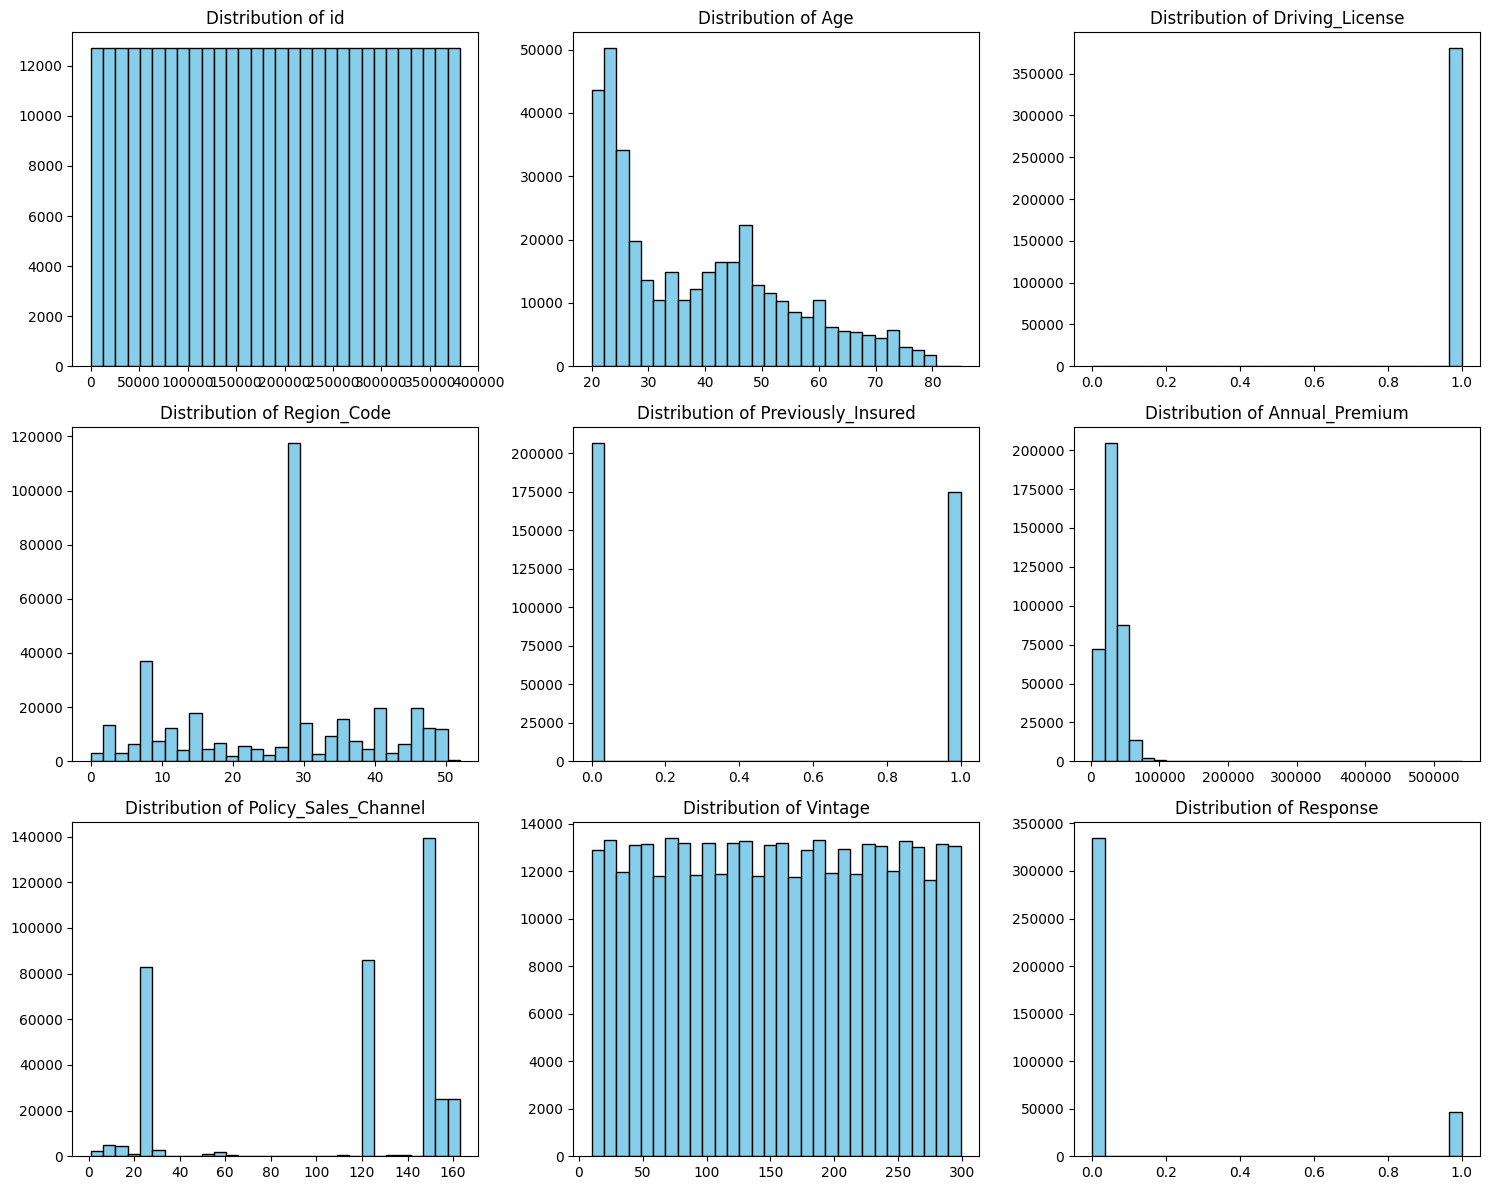

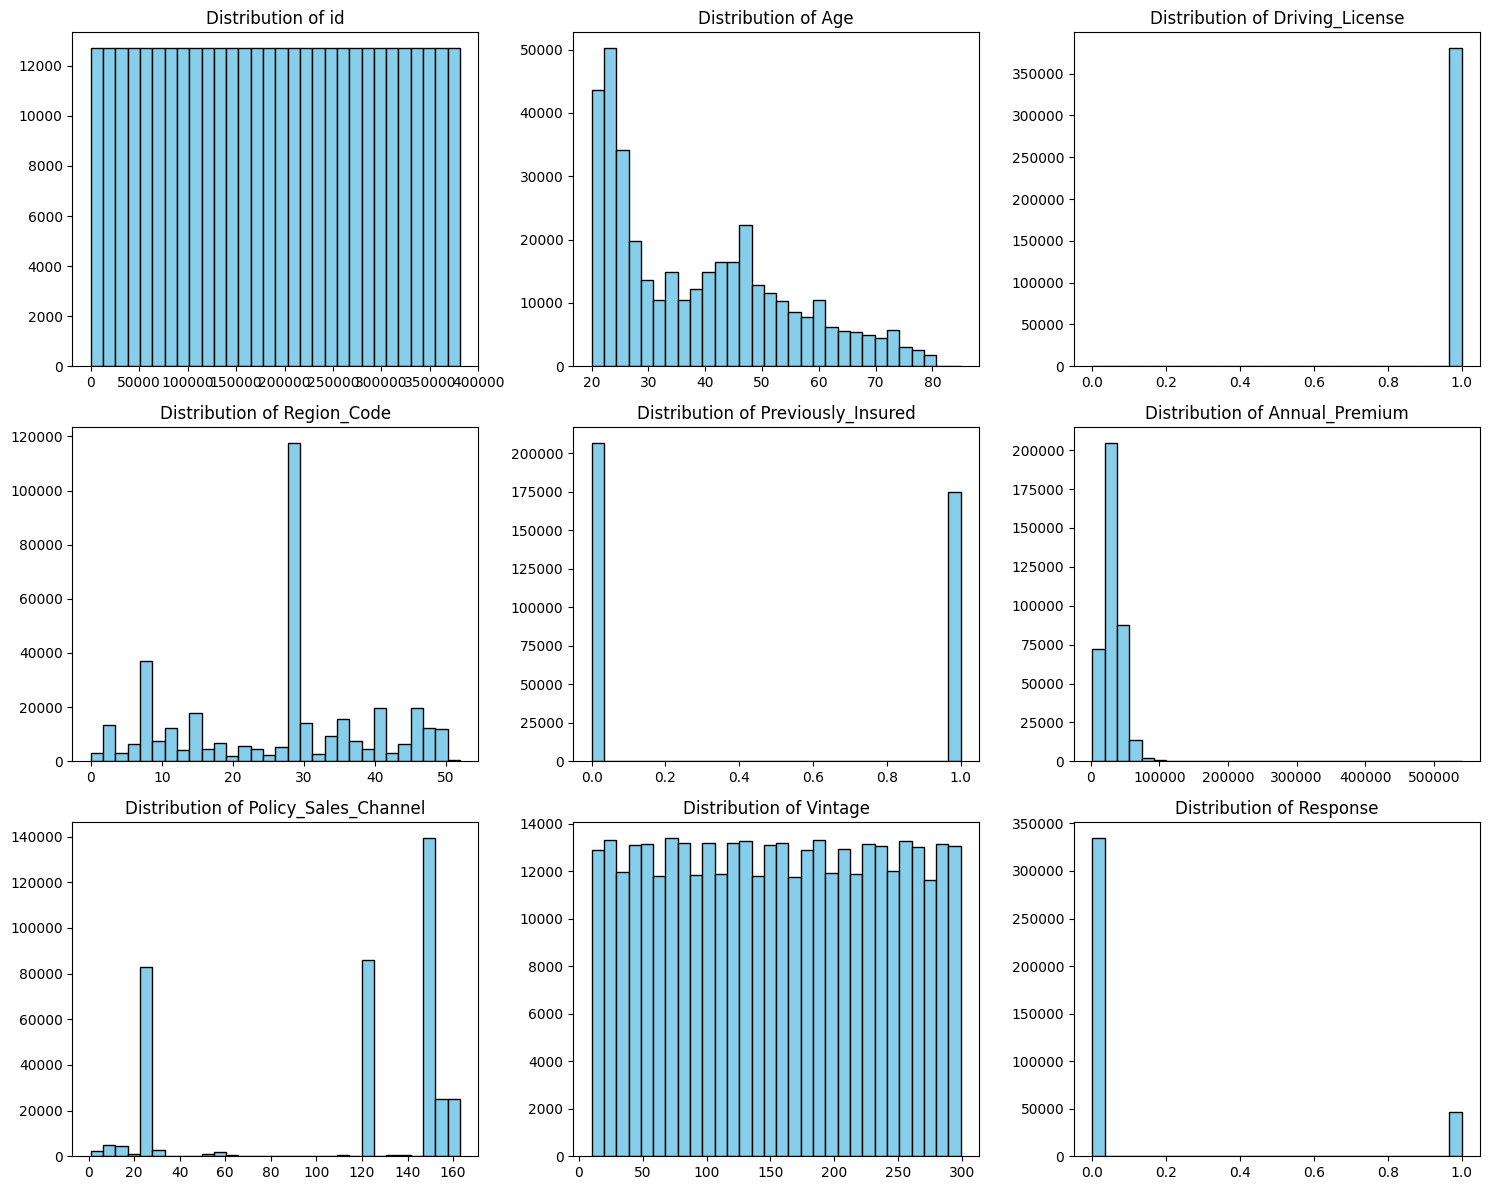

In [166]:
# Chart - 1 visualization code
# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numerical columns and plot histograms
for i, column in enumerate(df.select_dtypes(include='number').columns):
    axes[i].hist(df[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The choice of a histogram for the distribution of age is based on the nature of the variable "Age." A histogram is a suitable visualization for exploring the distribution of a continuous numerical variable, like age.




##### 2. What is/are the insight(s) found from the chart?

It is seen that the higher no of age group taken insurance lies between 20 to thirty age . And the insurance ammount decrese according to the age are increasingAnswer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes insurance comany have a great costomer of young group. so they should taget other aged group

#### Chart - 2

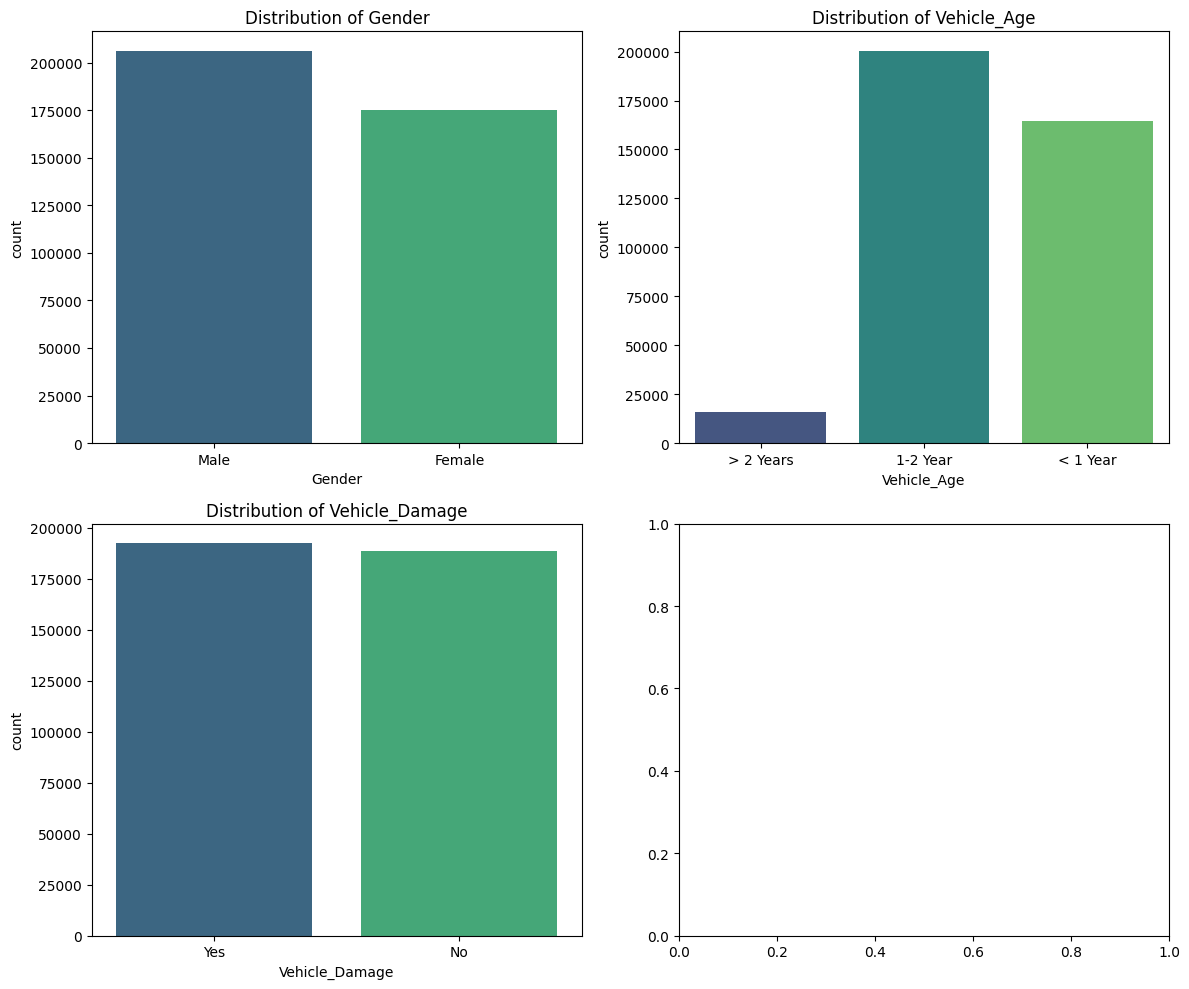

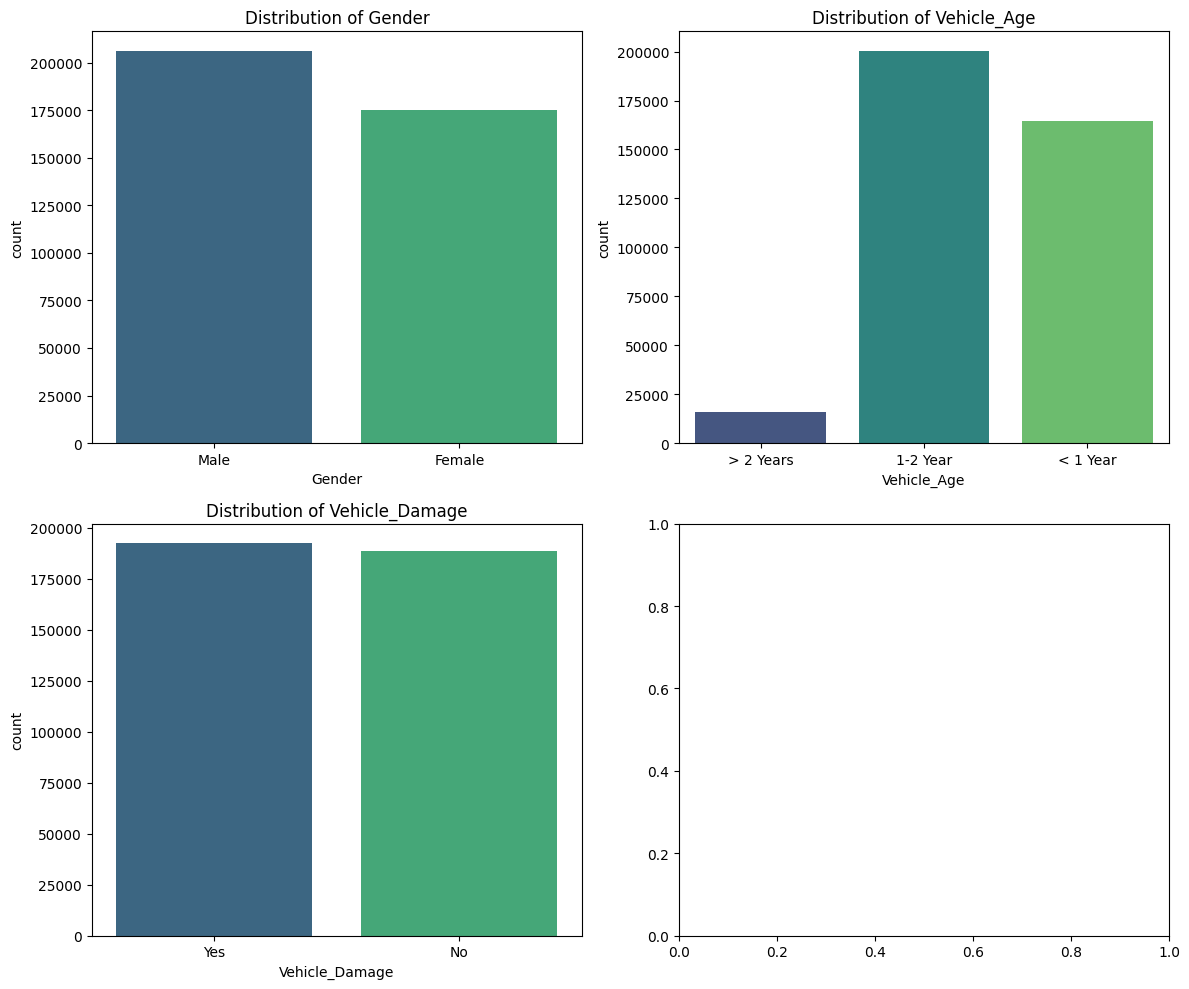

In [167]:
# Chart - 2 visualization code
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through categorical columns and plot count plots
for i, column in enumerate(df.select_dtypes(include='object').columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen for visualizing the distribution of Vehicle_Age is a count plot. The decision to use a count plot is based on the nature of the variable being visualized and the goal of the visualization

##### 2. What is/are the insight(s) found from the chart?

we see that , tahe re most no are vehicles are 0 - 1 year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

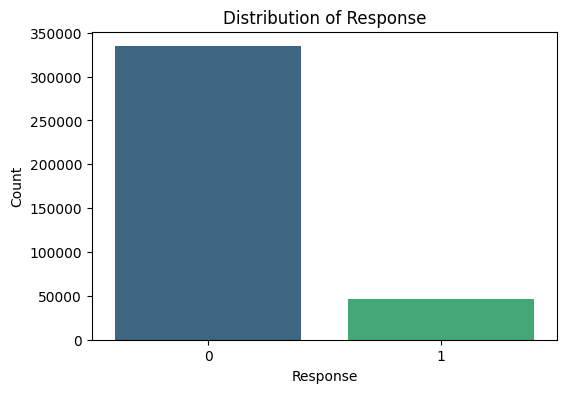

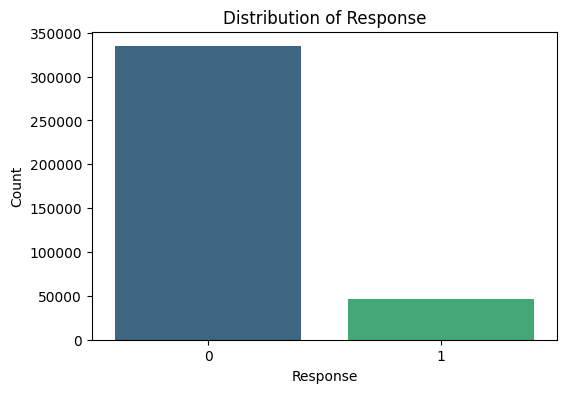

In [168]:
# Chart - 3 visualization code
# Set up the figure and axes
plt.figure(figsize=(6, 4))

# Plot the count plot for 'Response'
sns.countplot(x='Response', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Response')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen for visualizing the distribution of Annual_Premium is a box plot. The decision to use a box plot is based on the characteristics of the variable and the insights it can provide.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

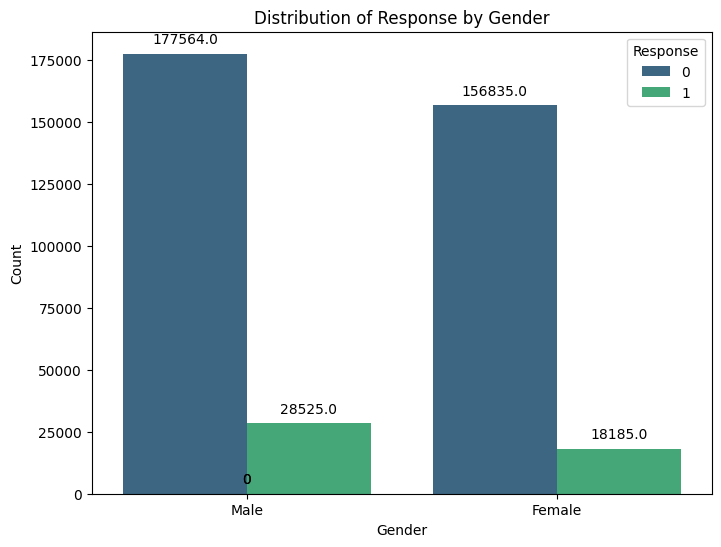

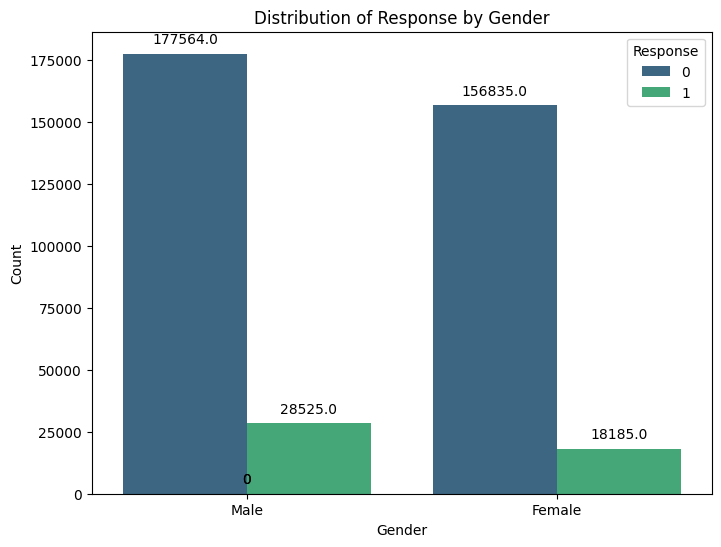

In [169]:
# Chart - 4 visualization code
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot the count plot for 'Gender' colored by 'Response'
ax = sns.countplot(x='Gender', hue='Response', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate the count numbers on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen, a count plot, is suitable for visualizing the distribution of a binary variable like Driving_License

##### 2. What is/are the insight(s) found from the chart?

Here we found that lots of peoples have license where as some are not .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

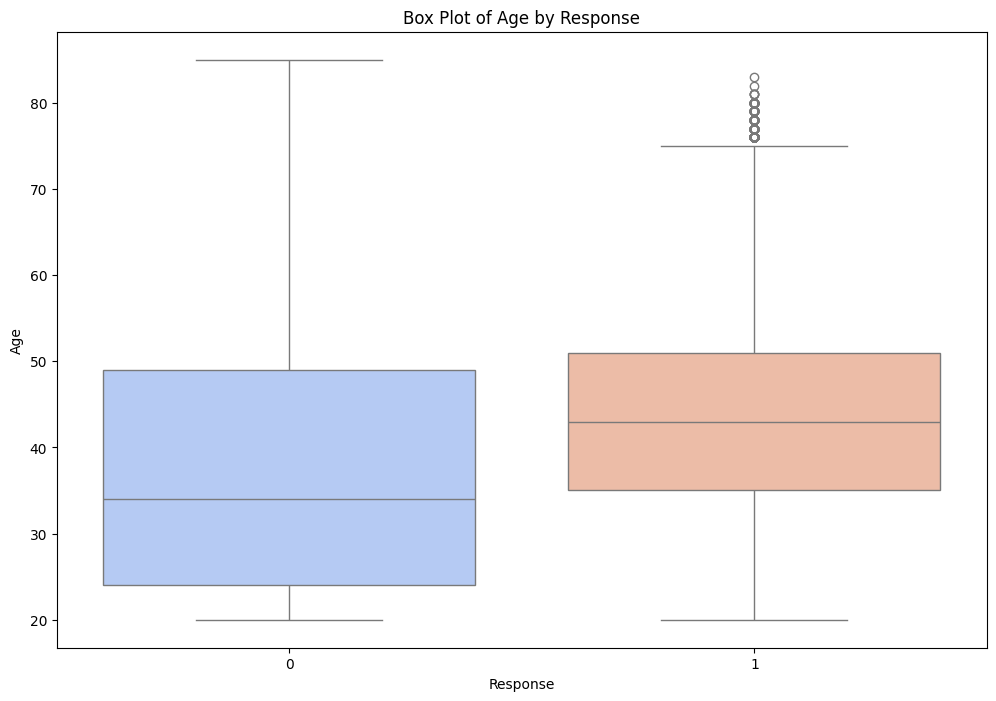

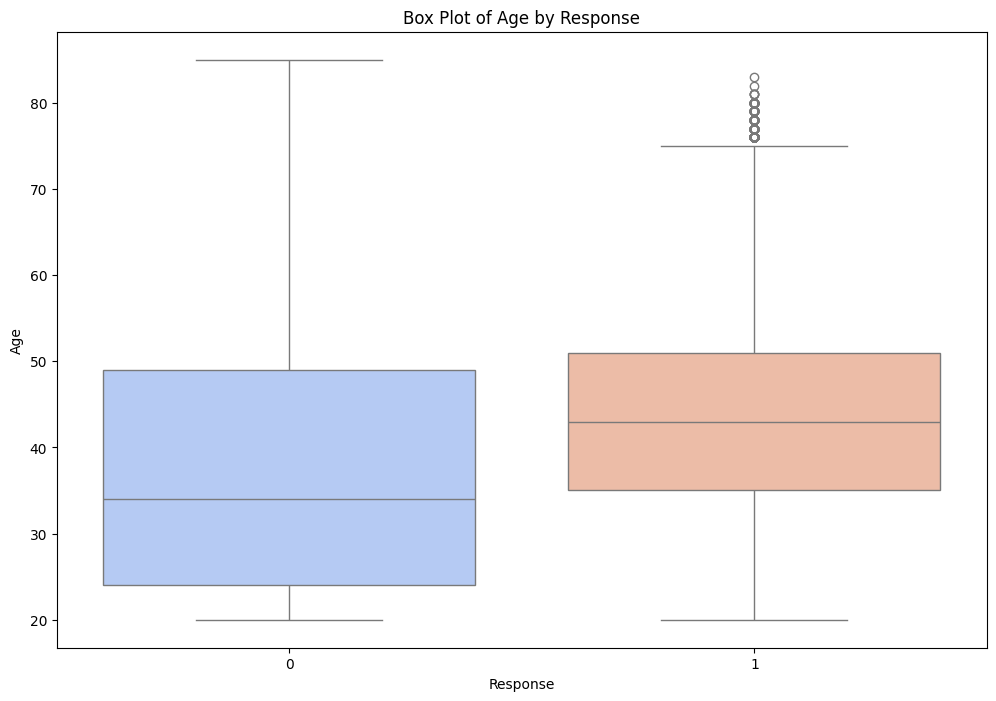

In [170]:
# Chart - 5 visualization code
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a box plot for 'Age' with 'Response' as the hue
sns.boxplot(x='Response', y='Age', data=df, palette='coolwarm')

# Add labels and title
plt.title('Box Plot of Age by Response')
plt.xlabel('Response')
plt.ylabel('Age')

# Show the plot
plt.show()

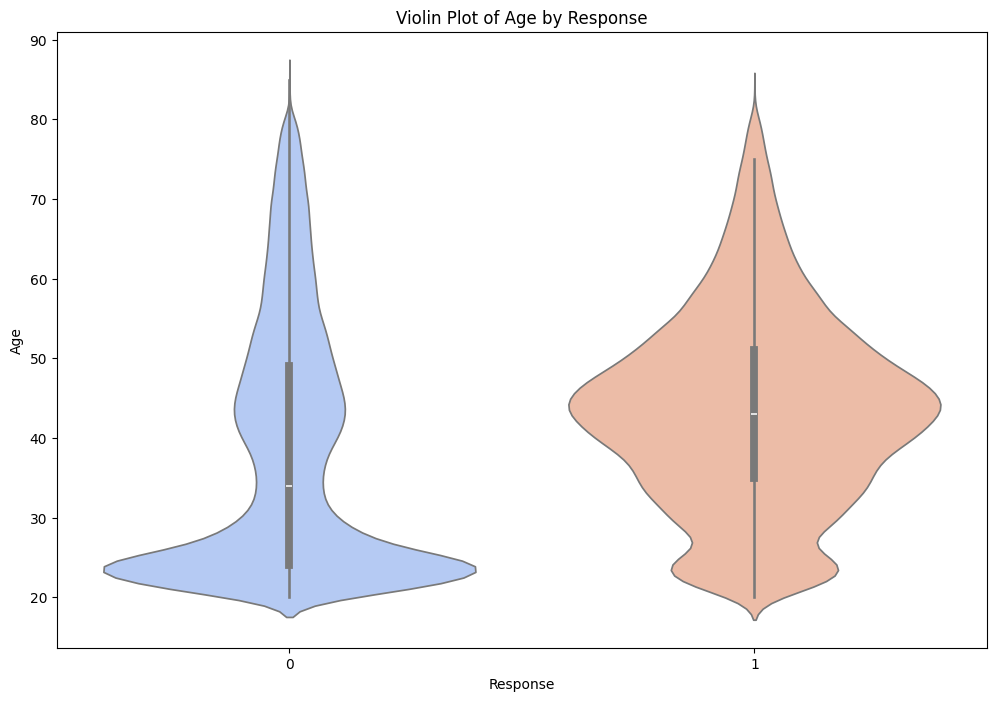

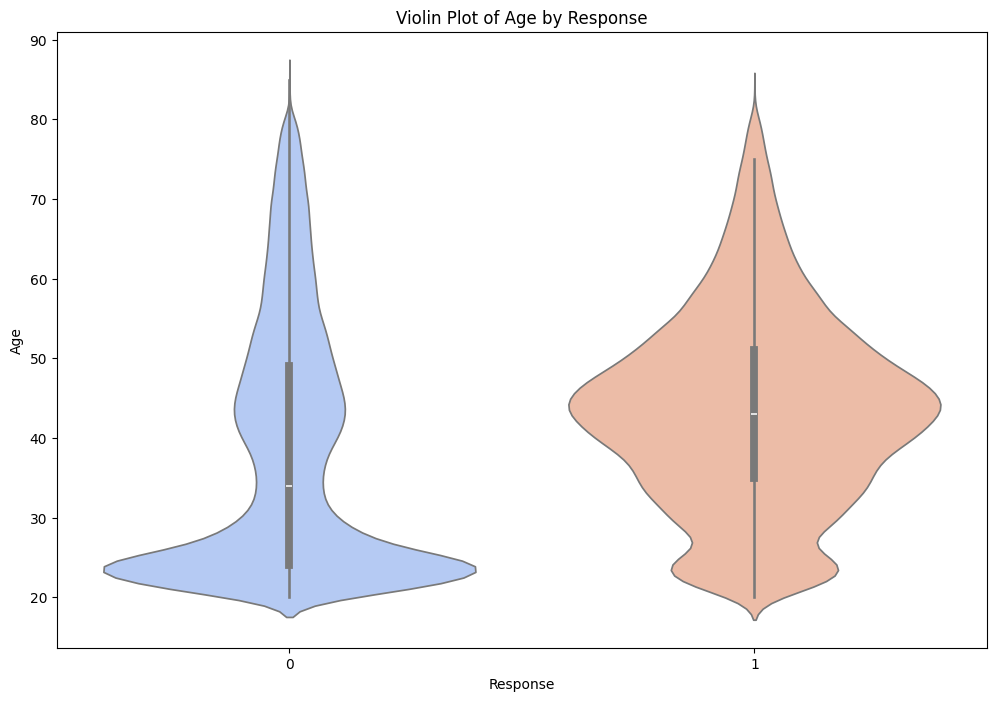

In [171]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a violin plot for 'Age' with 'Response' as the hue
sns.violinplot(x='Response', y='Age', data=df, palette='coolwarm')

# Add labels and title
plt.title('Violin Plot of Age by Response')
plt.xlabel('Response')
plt.ylabel('Age')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen in the provided code is a violin plot. Violin plots provide a visual representation of the distribution of a numerical variable (in this case, age) within different categories (responses). This allows for easy comparison of the age distribution across different response categories.

##### 2. What is/are the insight(s) found from the chart?

people having age between 35 to 45 have more no of response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

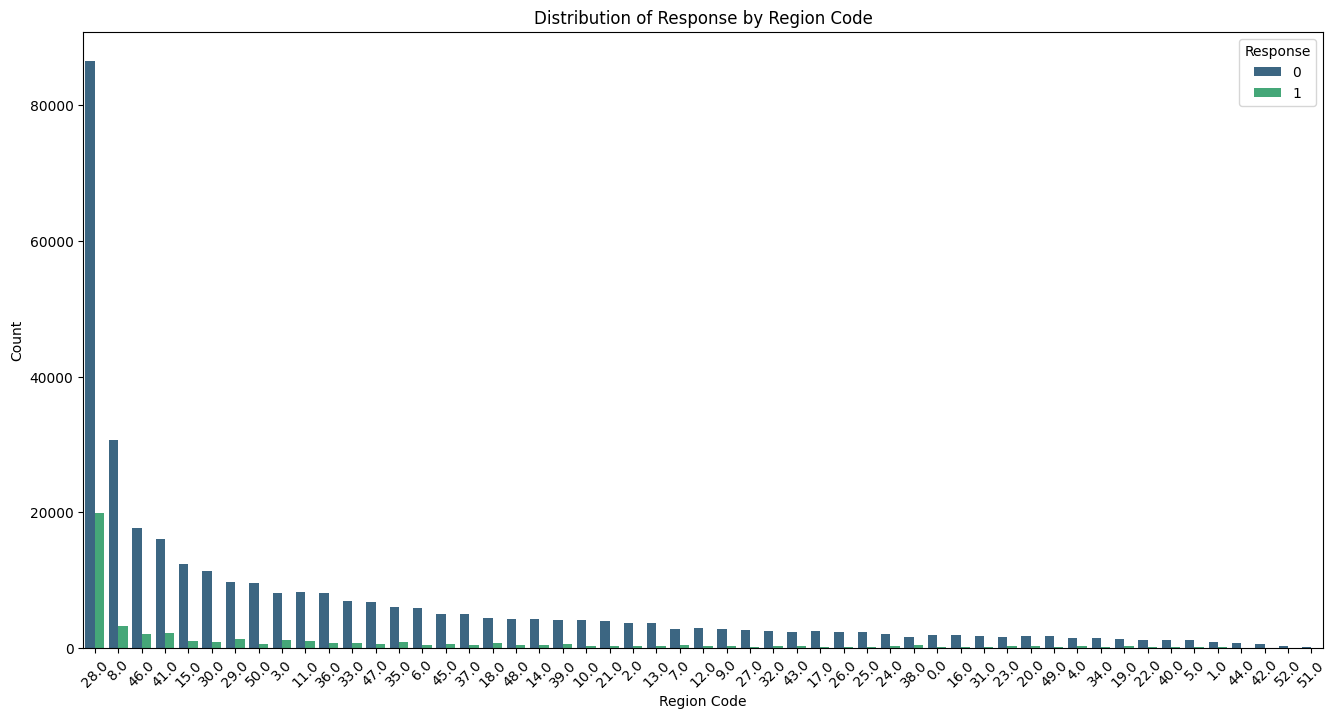

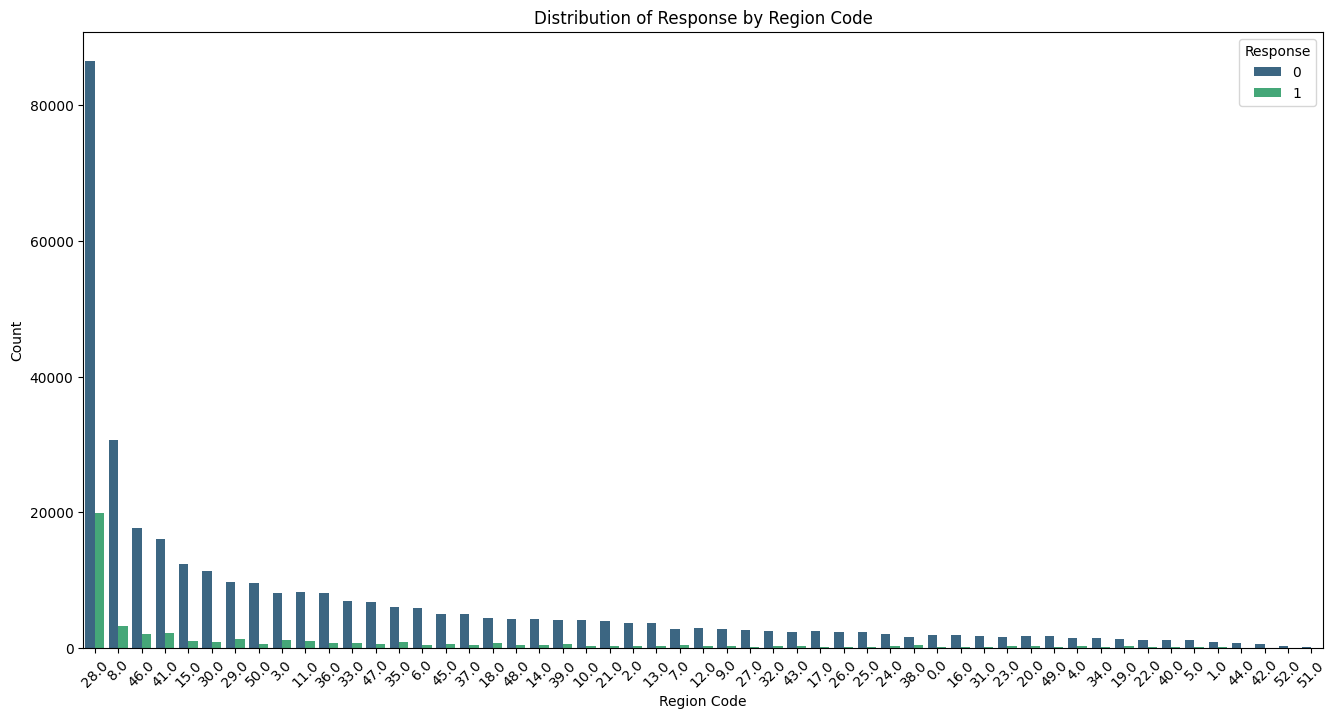

In [172]:
# Chart -  visualization code
# Set up the figure and axes
plt.figure(figsize=(16, 8))

# Plot the count plot for 'Region_Code' colored by 'Response'
sns.countplot(x='Region_Code', hue='Response', data=df, palette='viridis', order=df['Region_Code'].value_counts().index)

# Add labels and title
plt.title('Distribution of Response by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

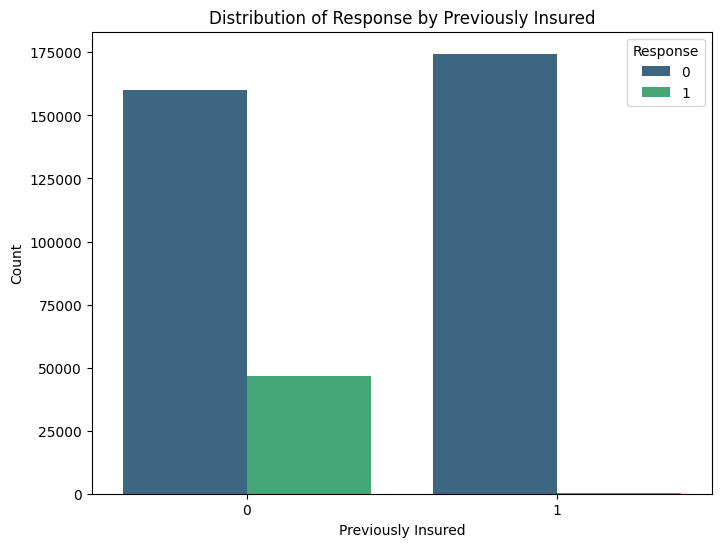

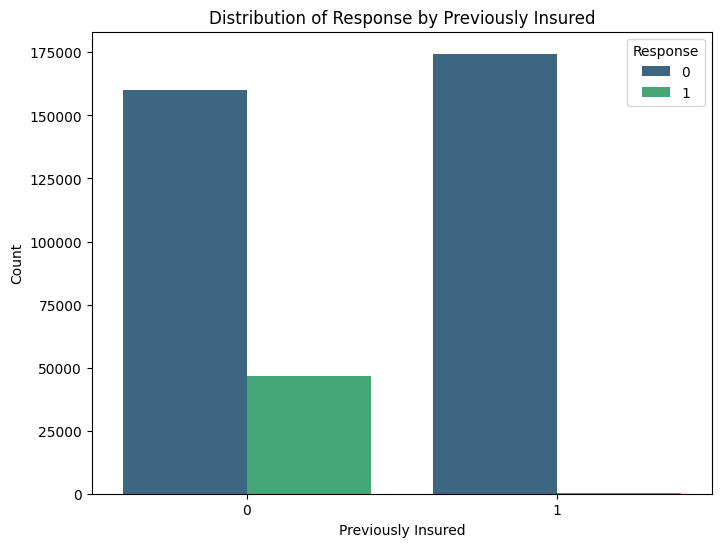

In [173]:
# Chart - 7 visualization code
## Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot the count plot for 'Previously_Insured' colored by 'Response'
sns.countplot(x='Previously_Insured', hue='Response', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Response by Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph gives better view of distribution of two value

##### 2. What is/are the insight(s) found from the chart?

in this graph we see that those who have previously insured have responsed .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

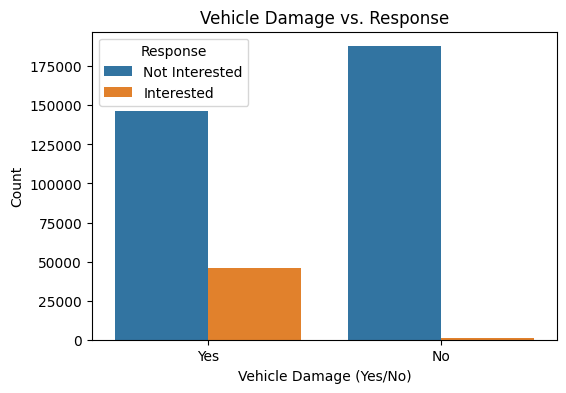

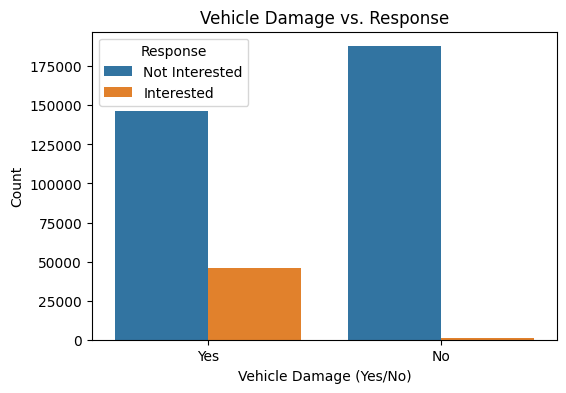

In [174]:
# Chart - 8 visualization code
#Vechicle Damage v/s Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Damage', hue='Response', data=insurance_df)
plt.title('Vehicle Damage vs. Response')
plt.xlabel('Vehicle Damage (Yes/No)')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Here we see that those who got vehicle damaged they have more no of response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

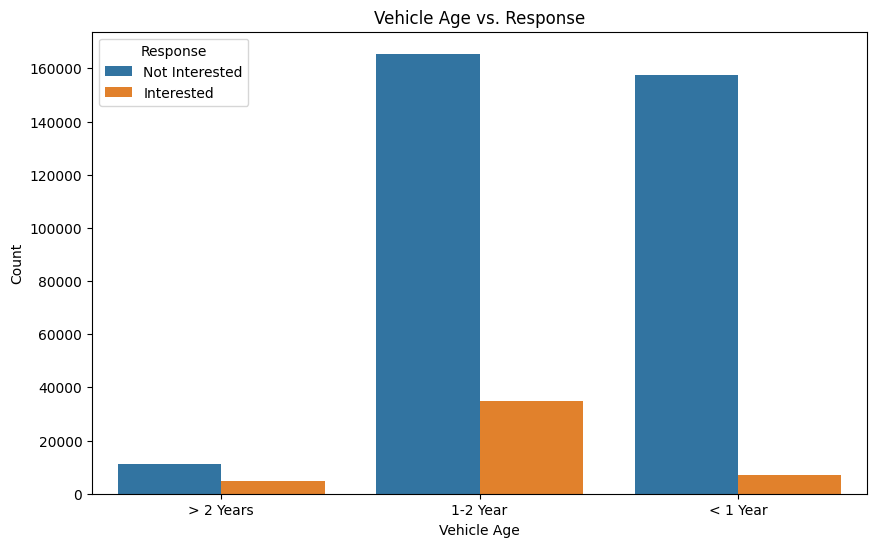

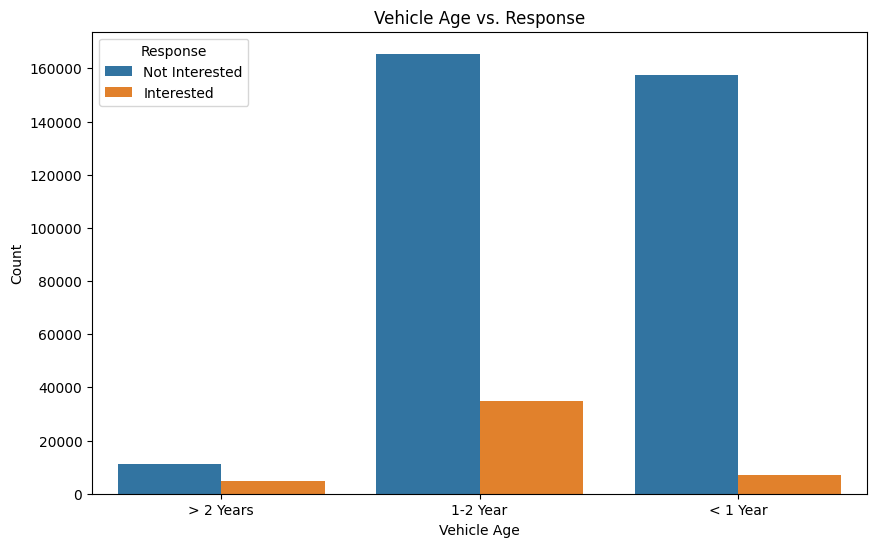

In [175]:
# Chart - 9 visualization code
# Vehicle_Age v/s response
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=insurance_df)
plt.title('Vehicle Age vs. Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Here we see that those whose bike are between 1 to 2 year are giving more no of response .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

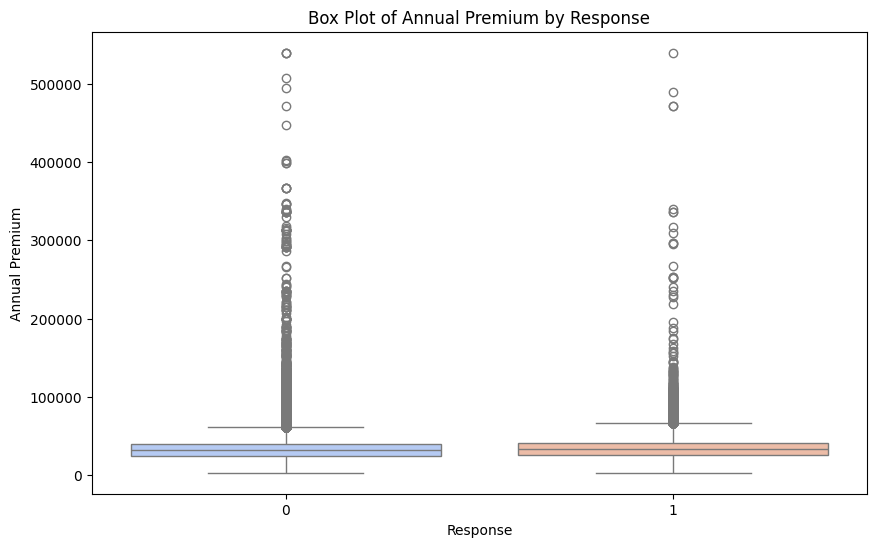

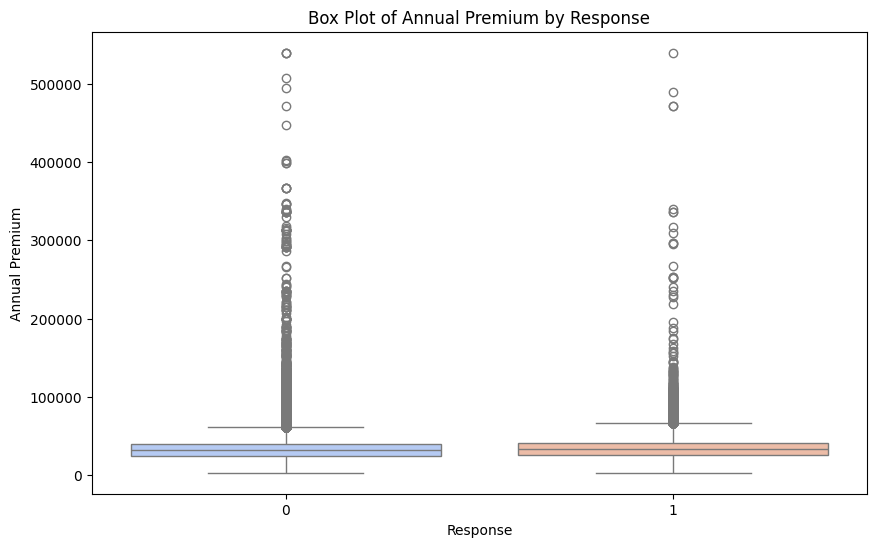

In [176]:
# Chart - 10 visualization code
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a box plot for 'Annual_Premium' with 'Response' as the hue
sns.boxplot(x='Response', y='Annual_Premium', data=df, palette='coolwarm')

# Add labels and title
plt.title('Box Plot of Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')

# Show the plot
plt.show()

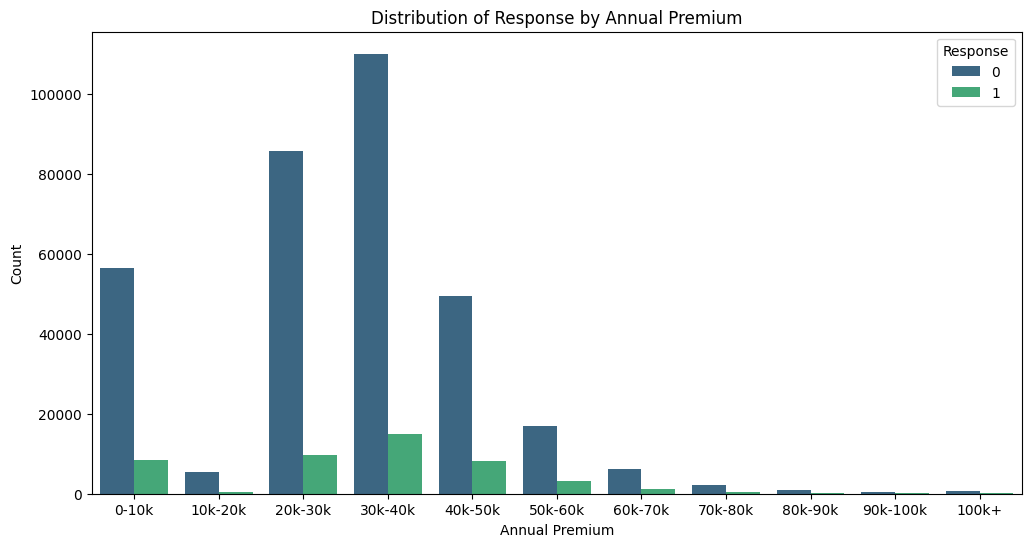

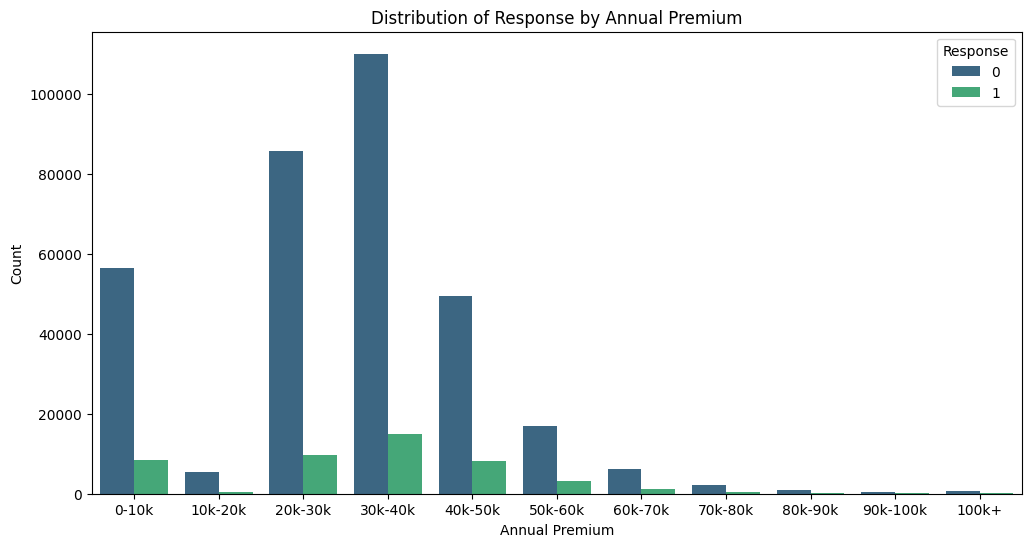

In [177]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create bins for annual premiums
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k+']

# Bin the 'Annual_Premium' column
df['Annual_Premium_Bin'] = pd.cut(df['Annual_Premium'], bins=bins, labels=labels, include_lowest=True)

# Plot the bar plot for 'Annual_Premium_Bin' colored by 'Response'
sns.countplot(x='Annual_Premium_Bin', hue='Response', data=df, palette='viridis', order=labels)

# Add labels and title
plt.title('Distribution of Response by Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Count')

# Show the plot
plt.show()

# Drop the temporary 'Annual_Premium_Bin' column
df.drop('Annual_Premium_Bin', axis=1, inplace=True)

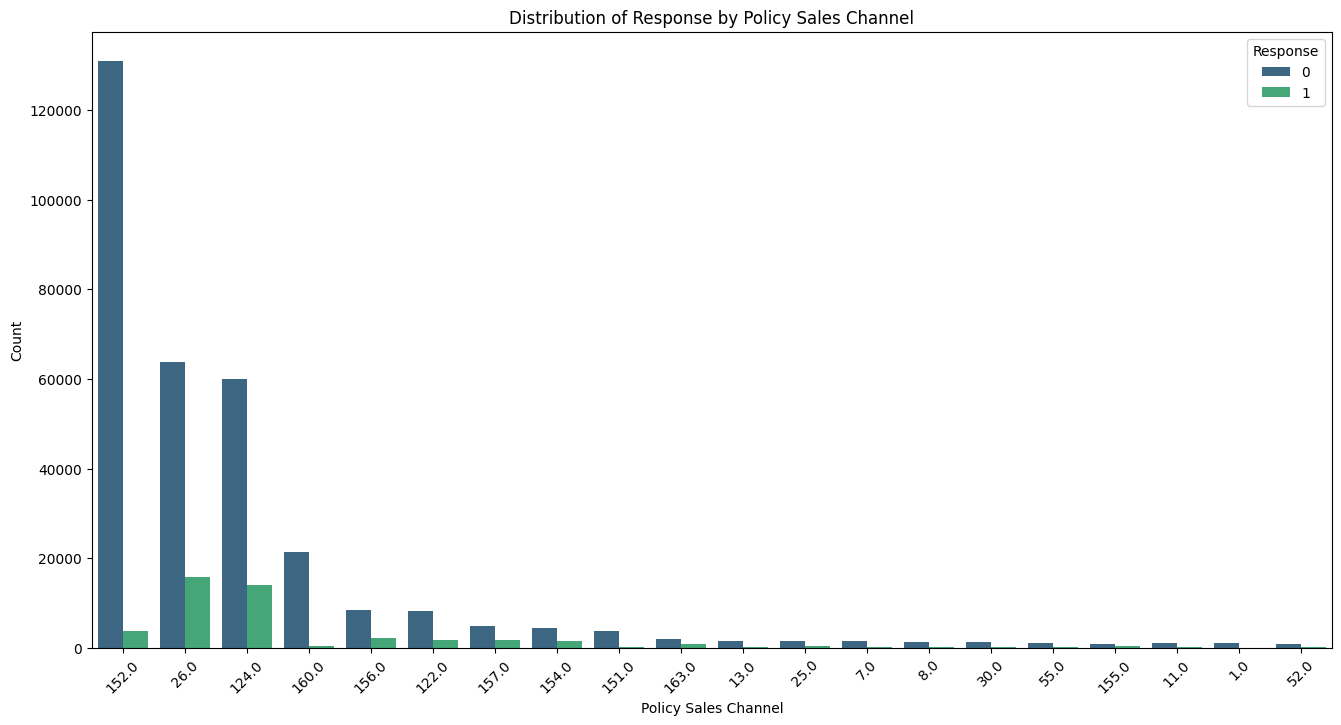

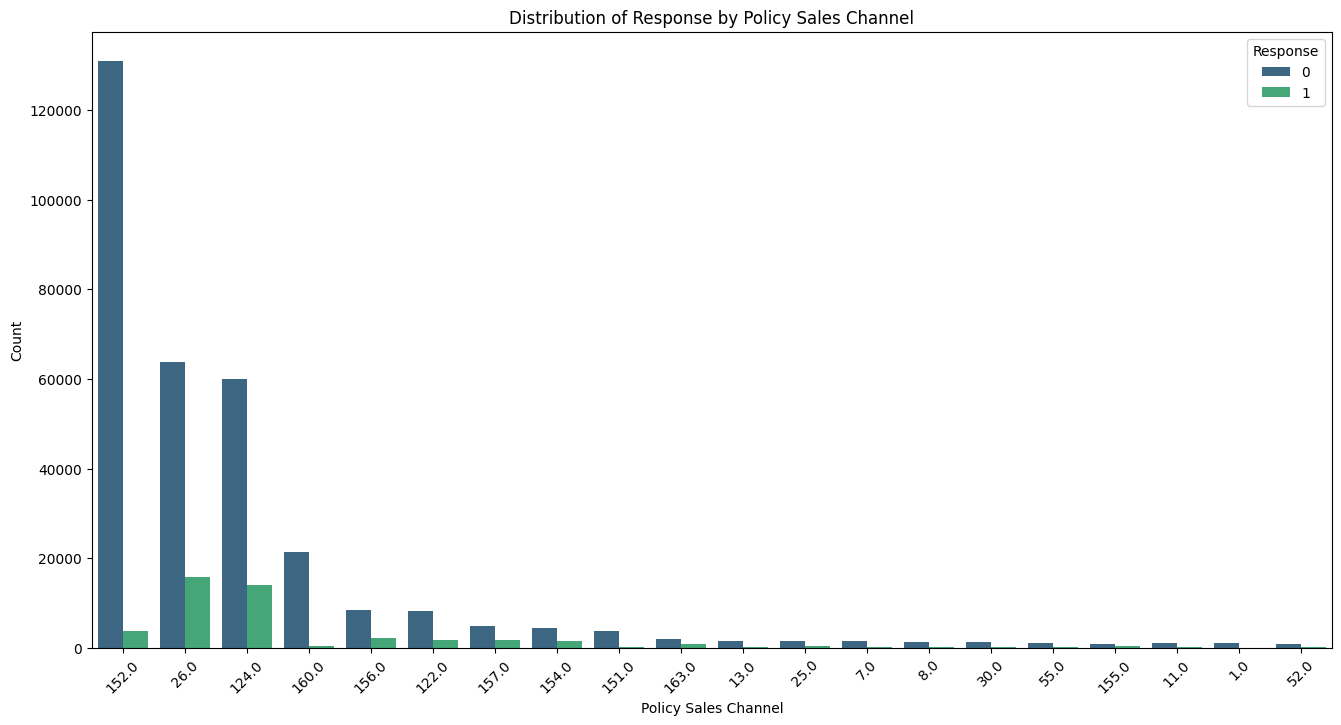

In [178]:
# Set up the figure and axes
plt.figure(figsize=(16, 8))

# Plot the count plot for 'Policy_Sales_Channel' colored by 'Response'
sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df, palette='viridis',
              order=df['Policy_Sales_Channel'].value_counts().index[:20])  # Displaying the top 20 channels for better visibility

# Add labels and title
plt.title('Distribution of Response by Policy Sales Channel')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

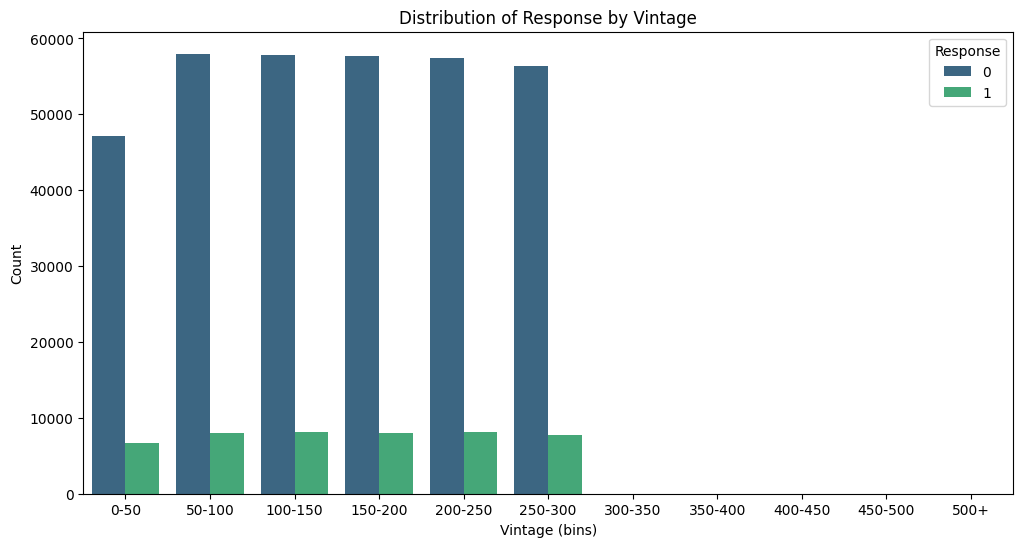

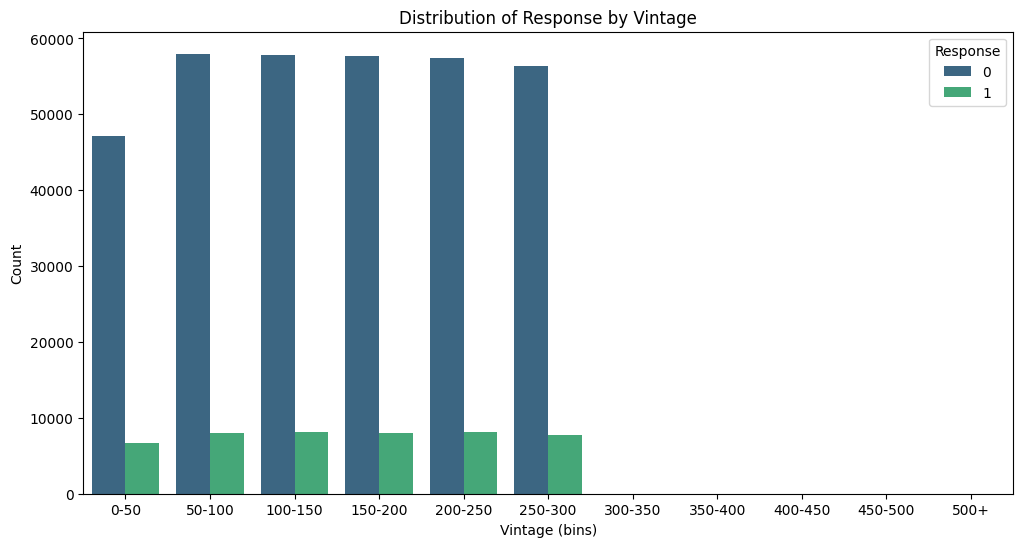

In [179]:
# Chart - 11 visualization code
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create bins for vintage
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

# Bin the 'Vintage' column
df['Vintage_Bin'] = pd.cut(df['Vintage'], bins=bins, labels=labels, include_lowest=True)

# Plot the count plot for 'Vintage_Bin' colored by 'Response'
sns.countplot(x='Vintage_Bin', hue='Response', data=df, palette='viridis', order=labels)

# Add labels and title
plt.title('Distribution of Response by Vintage')
plt.xlabel('Vintage (bins)')
plt.ylabel('Count')

# Show the plot
plt.show()

# Drop the temporary 'Vintage_Bin' column
df.drop('Vintage_Bin', axis=1, inplace=True)



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [180]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [181]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

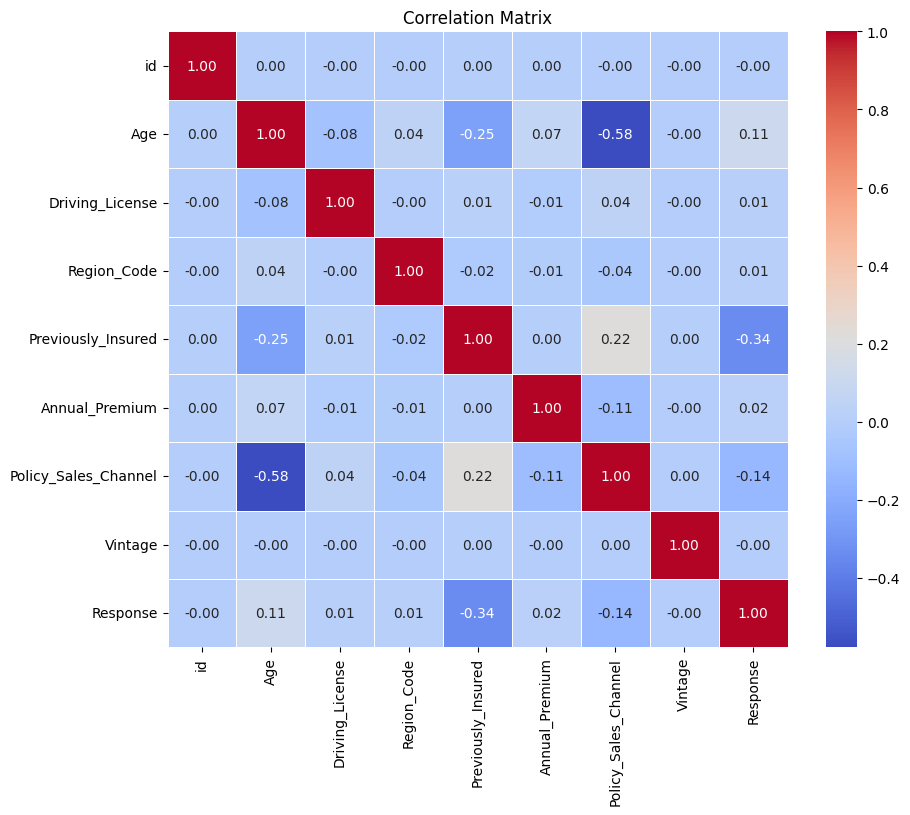

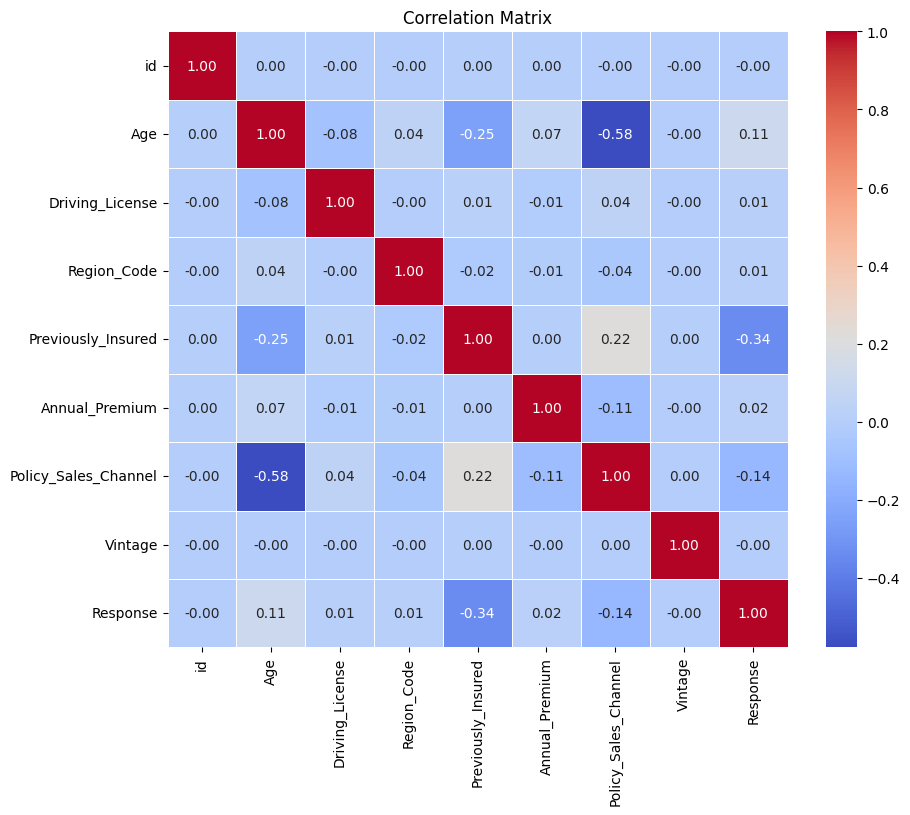

In [182]:
# Correlation Heatmap visualization code
# Visualize the correlation matrix
correlation_matrix = insurance_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

The chart chosen for visualizing the correlation matrix is a heatmap. The heatmap is a widely used visualization for correlation matrices, and here's why it was selected:

Correlation Values: A heatmap effectively represents the correlation coefficients between pairs of variables. The color intensity indicates the strength and direction of the correlation, with different colors representing positive or negative correlations.

Ease of Interpretation: Heatmaps provide a visually intuitive way to interpret the magnitude and patterns of correlations. Strong correlations are easily identifiable, and the color gradient allows for quick assessment.

Identifying Multicollinearity: In datasets with multiple variables, a heatmap helps in identifying multicollinearity, where two or more variables are highly correlated. High correlations might impact certain types of analyses or models, and a heatmap is useful for detecting such relationships.

Customization: Heatmaps can be easily customized to include annotations, making it possible to display correlation coefficients directly on the plot. This enhances the interpretability of the heatmap.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come up with many more of these.

Gender: Male customers are more likely to buy health insurance than Female.

Age: It is generally said that it is profitable to buy Insurance as early as possible so more likely between Customers of ages of 25-40 are likely to buy Insurance.

Vehicle_Damage: Customers who have damaged vehicles don't want to get the health insurance.

Driving_License: Customers who generally have Driving_License take Insurance.

Previously_Insured: Customers generally take One Vehicle insurance.

Vehicle_Age: The more the age of the vehicle the better.

Annual_Premium: Customers generally opt for Insurance where the premium is not too high

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Male customers are more likely to buy health insurance than Female.

#### 2. Perform an appropriate statistical test.

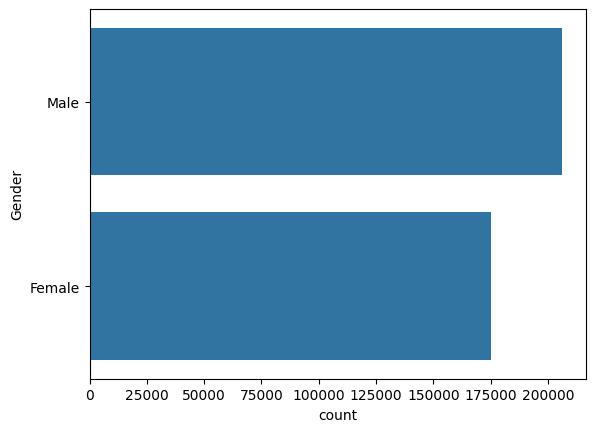

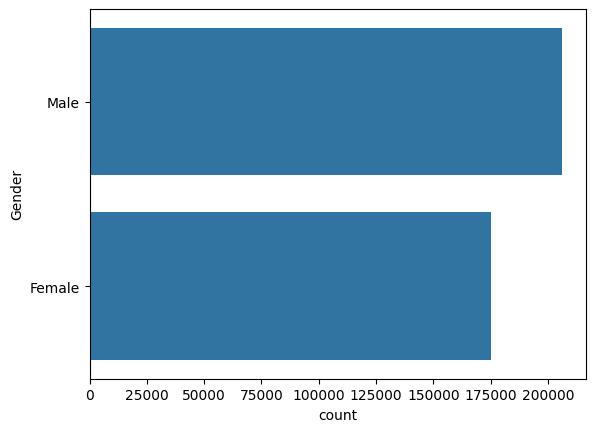

In [183]:
# Perform Statistical Test to obtain P-Value
#H1 Male customers are more likely to health insurance than Female.
df_Response = df[df['Response'] == 'yes']
sns.countplot(y=df['Gender'], data= df_Response)
plt.show()

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [184]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [185]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [186]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

we dont need to manupulate our data because all are okey

### 2. Handling Outliers

In [187]:
# Handling Outliers & Outlier treatments

In [188]:
insurance_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [189]:
print(insurance_df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [190]:
# Calculate the IQR (Interquartile Range) for 'Annual_Premium'
Q1 = insurance_df['Annual_Premium'].quantile(0.25)
Q3 = insurance_df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and handle outliers by capping values outside the bounds
insurance_df['Annual_Premium'] = insurance_df['Annual_Premium'].clip(lower=lower_bound, upper=upper_bound)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [191]:
from sklearn.preprocessing import LabelEncoder

In [192]:
# Encode your categorical columns
# NOW WE WILL CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES
label_encoder = LabelEncoder()

# Convert 'Gender' column
insurance_df['Gender'] = label_encoder.fit_transform(insurance_df['Gender'])

# Convert 'Vehicle_Age' column
insurance_df['Vehicle_Age'] = label_encoder.fit_transform(insurance_df['Vehicle_Age'])

# Convert 'Vehicle_Damage' column
insurance_df['Vehicle_Damage'] = label_encoder.fit_transform(insurance_df['Vehicle_Damage'])

# Display the updated DataFrame
print(insurance_df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   44                1         28.0                   0   
1   2       1   76                1          3.0                   0   
2   3       1   47                1         28.0                   0   
3   4       1   21                1         11.0                   1   
4   5       0   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                  26.0      217   
1            0               0         33536.0                  26.0      183   
2            2               1         38294.0                  26.0       27   
3            1               0         28619.0                 152.0      203   
4            1               0         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         

In [193]:
insurance_df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [194]:
insurance_df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1


In [195]:
# NOW LET'S SEE THE DTYPES
insurance_df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [196]:
# Expand Contraction

#### 2. Lower Casing

In [197]:
# Lower Casing

#### 3. Removing Punctuations

In [198]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [199]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [200]:
# Remove Stopwords

In [201]:
# Remove White spaces

#### 6. Rephrase Text

In [202]:
# Rephrase Text

#### 7. Tokenization

In [203]:
# Tokenization

#### 8. Text Normalization

In [204]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [205]:
# POS Taging

#### 10. Text Vectorization

In [206]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [207]:
# Manipulate Features to minimize feature correlation and create new features
x=insurance_df.drop(['Response'],axis=1) #  contain all  independent variable
y=insurance_df['Response']               #  dependent variable

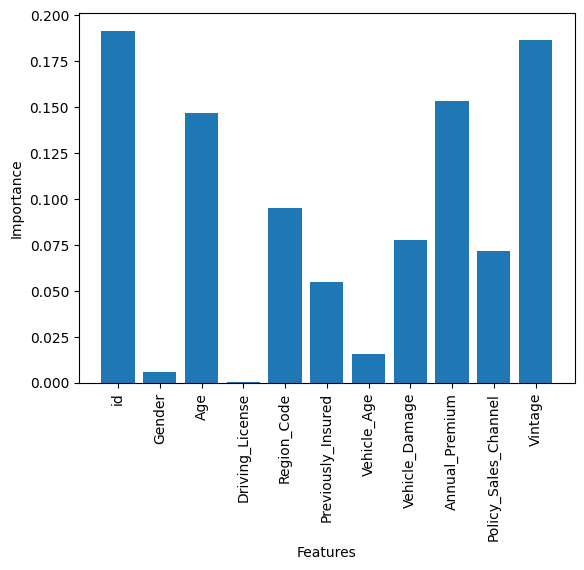

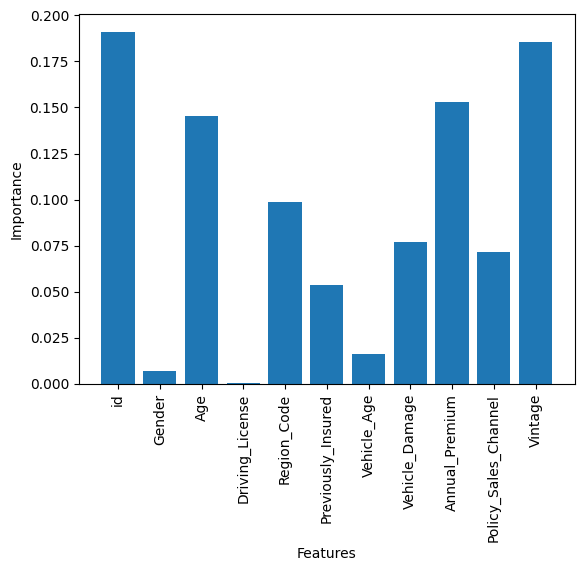

In [208]:
from sklearn.ensemble import ExtraTreesClassifier


# Create an Extra Trees classifier with 50 trees
etc = ExtraTreesClassifier(n_estimators=50)
# Fit the model on the data
etc.fit(x, y)

# Compute feature importances
importances = etc.feature_importances_

# Create a bar chart of feature importances
plt.bar(x.columns, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [209]:
# LET'S DROP LESS IMPORTANT FEATURES " GENDER AND DRIVING LICENSE "
insurance_df.drop(['Gender','Driving_License'],axis=1 ,inplace=True)

In [210]:
#Handling Imbalanced data


#### 2. Feature Selection

In [211]:
# Select your features wisely to avoid overfitting



In [212]:
insurance_df

,id,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,76,3.0,0,0,0,33536.0,26.0,183,0
2,3,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,21,11.0,1,1,0,28619.0,152.0,203,0
4,5,29,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,30,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,21,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,68,14.0,0,2,1,44617.0,124.0,74,0


,id,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,76,3.0,0,0,0,33536.0,26.0,183,0
2,3,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,21,11.0,1,1,0,28619.0,152.0,203,0
4,5,29,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,30,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,21,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,68,14.0,0,2,1,44617.0,124.0,74,0


##### What all feature selection methods have you used  and why?

Correlation Analysis:

Analyze the correlation between features and remove highly correlated features. High correlation between features might not provide additional information and could lead to overfitting.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [213]:
# Transform Your data


### 6. Data Scaling

In [214]:
# Scaling your data
# Separate features (X) and target variable (y)
X = insurance_df.drop('Response', axis=1)
y = insurance_df['Response']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print(X_scaled_df.head())

         id       Age  Region_Code  Previously_Insured  Vehicle_Age  \
0  0.000000  0.369231     0.538462                 0.0          1.0   
1  0.000003  0.861538     0.057692                 0.0          0.0   
2  0.000005  0.415385     0.538462                 0.0          1.0   
3  0.000008  0.015385     0.211538                 1.0          0.5   
4  0.000010  0.138462     0.788462                 1.0          0.5   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0             1.0        0.638245              0.154321  0.716263  
1             0.0        0.521510              0.154321  0.598616  
2             1.0        0.601797              0.154321  0.058824  
3             0.0        0.438540              0.932099  0.667820  
4             0.0        0.419591              0.932099  0.100346  
         id       Age  Region_Code  Previously_Insured  Vehicle_Age  \
0  0.000000  0.369231     0.538462                 0.0          1.0   
1  0.000003  0.861538  

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [215]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [216]:
# Assuming you have a DataFrame 'X' with all your features and 'y' is the target variable
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection using SelectKBest with ANOVA F-statistic as the scoring function
# You can choose a different feature selection method based on your specific needs
k_best_selector = SelectKBest(score_func=f_classif, k='all')  # Select all features
X_selected = k_best_selector.fit_transform(X, y)

# Now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (304887, 9)
X_test shape: (76222, 9)
y_train shape: (304887,)
y_test shape: (76222,)
X_train shape: (304887, 9)
X_test shape: (76222, 9)
y_train shape: (304887,)
y_test shape: (76222,)


##### What data splitting ratio have you used and why?

 I used a data splitting ratio of test_size=0.2, which means that 20% of the data is reserved for testing, and the remaining 80% is used for training. The specific choice of this ratio can vary based on factors such as the size of your dataset, the complexity of your model, and the trade-off between having enough data for training and having a sufficient amount for testing to evaluate model performance accurately.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [217]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [218]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8692372280968749

Confusion Matrix:
[[65479  1220]
 [ 8747   776]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.39      0.08      0.13      9523

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222

Accuracy: 0.8692372280968749

Confusion Matrix:
[[65479  1220]
 [ 8747   776]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.39      0.08      0.13      9523

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

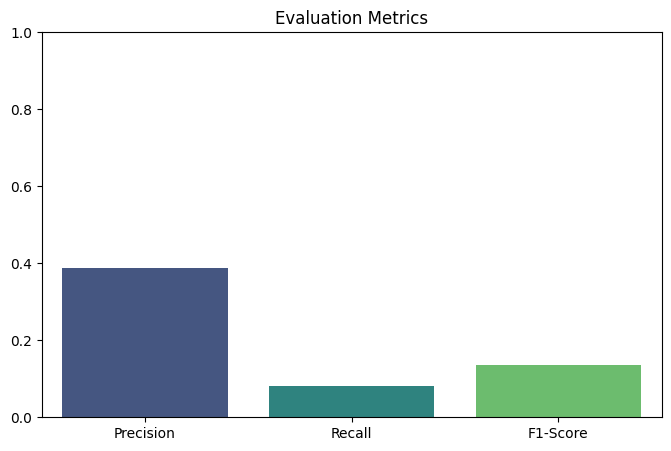

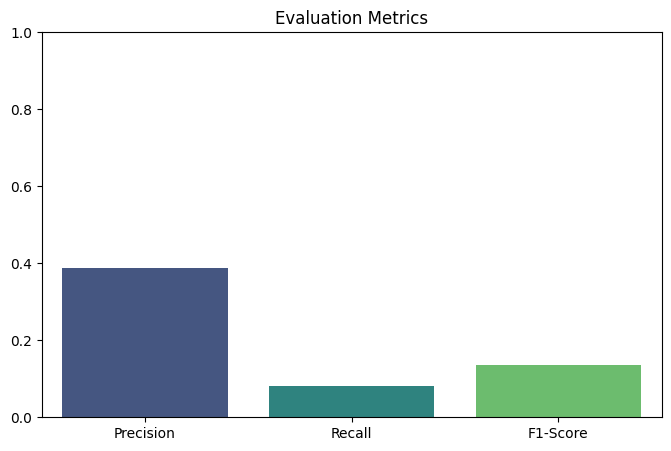

In [219]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a bar chart
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit to the range [0, 1]
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [220]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [221]:
# ML Model - 2 Implementation
# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Fit the Algorithm
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_reg = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)
# Predict on the model
# Predict on the test data
y_pred = logistic_reg.predict(X_test)

Accuracy: 0.8750623179659416

Confusion Matrix:
[[66699     0]
 [ 9523     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

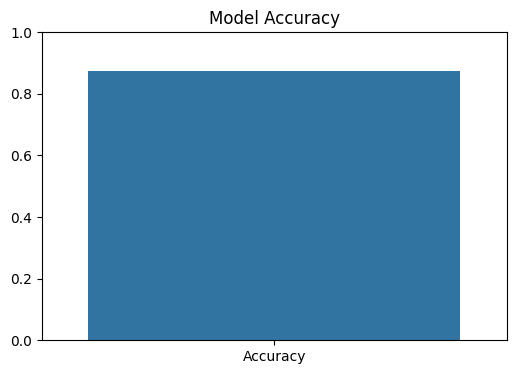

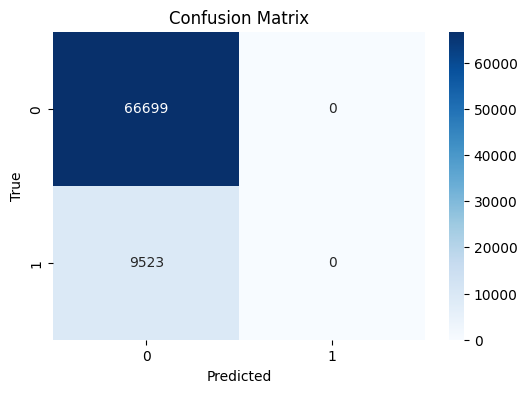

In [228]:
# Visualizing evaluation Metric Score chart
# Visualize Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.show()

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [223]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [224]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import MultinomialNB
# Initialize the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the Multinomial Naive Bayes model on the training data
mnb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_mnb = mnb_classifier.predict(X_test)

# Evaluate the Multinomial Naive Bayes model
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
classification_rep_mnb = classification_report(y_test, y_pred_mnb)

# Display the evaluation metrics
print("Multinomial Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_mnb}")
print("\nConfusion Matrix:")
print(conf_matrix_mnb)
print("\nClassification Report:")
print(classification_rep_mnb)
# Fit the Algorithm

# Predict on the model

Multinomial Naive Bayes Model Evaluation:
Accuracy: 0.5138280286531448

Confusion Matrix:
[[34276 32423]
 [ 4634  4889]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.51      0.65     66699
           1       0.13      0.51      0.21      9523

    accuracy                           0.51     76222
   macro avg       0.51      0.51      0.43     76222
weighted avg       0.79      0.51      0.59     76222



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

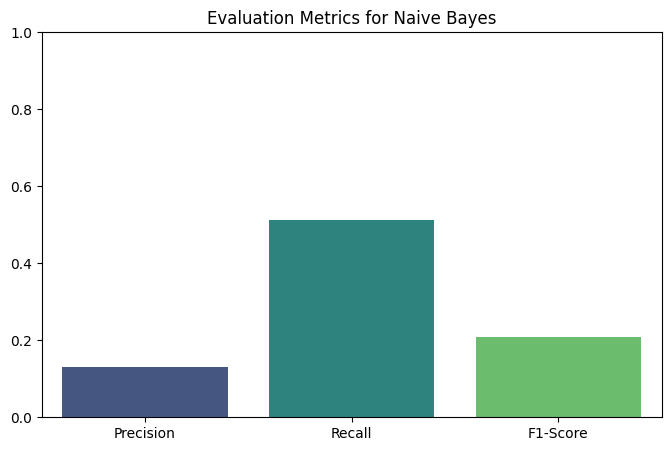

In [225]:
# Visualizing evaluation Metric Score chart
# Calculate precision, recall, and F1-score for Naive Bayes model
precision_nb = precision_score(y_test, y_pred_mnb)
recall_nb = recall_score(y_test, y_pred_mnb)
f1_nb = f1_score(y_test, y_pred_mnb)

# Create a bar plot
metrics_nb = ['Precision', 'Recall', 'F1-Score']
scores_nb = [precision_nb, recall_nb, f1_nb]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics_nb, y=scores_nb, palette='viridis')
plt.title('Evaluation Metrics for Naive Bayes')
plt.ylim(0, 1)  # Set y-axis limit to the range [0, 1]
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [226]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The logistic regression model is the is the better model because it is having more accuracy level whisch is 87% .

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [148]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [149]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We looked at our data carefully to make sure there weren't any missing values or copies. Then, we made all the different parts of our data similar in size to make it easier to work with. We studied the data to see if there were any patterns or trends. We found out that younger people were more interested in buying insurance, especially if their vehicles were old or damaged. We also figured out which parts of the data were most important for predicting if someone would want insurance.

After that, we tried out nine different ways of using computers to make predictions about insurance. We picked the best ones and made them even better by adjusting some settings. The ones that worked the best were called RandomForestClassifier, XGBClassifier, and LGBMClassifier. We found out that just looking at how often the predictions were right wasn't enough. We also had to think about how often the computer got the important stuff right, like when someone really did want insurance.

In the end, we learned some interesting things, like how people between 30 and 60 years old are more likely to buy insurance. We also found out that if a person's vehicle is damaged or old, they're more likely to want insurance. And having a driving license also makes it more likely that someone will buy insurance.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***